## Insights to Food Deliveries in NYC - FoodHub Data

Food delivery apps...you either love them or you hate them, but regardless of what you personally think of them, they are here to stay for awhile. Whether you have a hectic lifestyle, you have little energy to cook for yourself, or you just can't help but resist the urge for a particular food craving. Under these conditions, one can be easily lured by the many food options available at their disposiable - with just a few taps on your smartphone and your hunt for food has been completed in less than 5 minutes, and a deliverer arrives with your meal straight to your front door...paying for the convenience is just simply amazing at times.

With such services growing in popularity, a food aggregator company; Foodhub, has decided to launch their food delivery services in New York city to allow the city's residents the ability to complete food ordrers on their smartphones.

#### Objective

It has been some months now that the Foodhub has launched their services, and with the passing of time this has allowed them to obtain data on their customers. As any company, Foodhub would like to better understand it's customers so they can remain as a strong competitor in the food delivery industry. Now, (thanks to data provided by Ahsan Raza at Kaggle), we will now be helping Foodhub by deciphering their data so they can better understand their customers.

If you want to duplicate the project, you can download Ahsan's excel dataset found in [Kaggle](https://www.kaggle.com/datasets/ahsan81/food-ordering-and-delivery-app-dataset). Once you have downloaded this file, follow the steps below to duplicate these findings.

For starters, Foodhub would like to know the demand of different restaurants. In this case, as the appointed data analyst we will be conducting an exploratory data analysis (EDA) to understand customer's experiences.

Our tool of choice for this task will be Python. First, we'll start by importing popular Python libraries (Pandas and Numpy).

In [1]:
#install pandas
!pip install pandas

In [2]:
#install matplotlib.pyplot
#install seaborn
!pip install matplotlib.pyplot
!pip install seaborn

#ERROR message shown if already installed; code will state "Requirement already statisified"

ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot


In [3]:
#import libraries for data manipulation
import numpy as np
import pandas as pd

In [4]:
#import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

Next, we'll be reading the CSV file to view the variables we'll be working with.

In [5]:
# read the CSV file - here we are pulling the csv file with the direct filepath.
# if you are experiencing issues, make sure your csv filepath and replace backslashses with forward slashes
fd = pd.read_csv('C:/Users/micha/DataProjects/food_order.csv')

#fd is the name of our dataframe

No error is shown so we can now explore our csv file. Let's start by getting a summary of our dataframe to understand how the data is structured.

In [6]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


Here we our dataset contains 1898 entries (rows) and 9 columns. 4 columns are int64 (order_id, customer_id, food_prepartion_time, delivery_time) 4 are object (restaurant_name, cusine_type, day_of_the_week, and rating), and 1 is float4 (cost_of_the_order).

Given this, we'll next view first few rows to better understand how these variables are defined.

In [7]:
#dataframe_name.head() - this will return the first 5 rows in the dataset. In this case, the dataframe was named fd
fd.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


From our first rows, we can see our variables are defined as:

- order_id: Unique ID of the order
- customer_id: ID of the customer who ordered the food
- restaurant_name: Name of the restaurant
- cuisine_type: Cuisine ordered by the customer
- cost: Cost of the order
- day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from   Monday to Friday and the weekend is Saturday and Sunday)
- rating: Rating given by the customer out of 5
- food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
- delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

Now that we understand the data we're working with. We want to clean our data before we perform exploratory analysis. It is crucial we do this now, otherwise our analysis will represent incorrect findings.

For our cleaning, we'll want to know if:
- there are any missing variables
- resaturant names are ambiguious/duplicated (we'll want to correct duplicates so they fall within the same category - more on this shorly)
- cusine types show any anomalies/ambiguity
- dates show any anomalies/ambiguity
- ratings show any anomalies/ambiguity

Let's see if our columns contain any missing values.

In [8]:
#Checking sum of null values in each column to analyze missing values
fd.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

Based on the output, we can see that there are no missing values.

*Note - You can also check this by using .isnull().any()*

In [9]:
#Checking sum of null values in each column to analyze missing values
fd.isnull().any()

order_id                 False
customer_id              False
restaurant_name          False
cuisine_type             False
cost_of_the_order        False
day_of_the_week          False
rating                   False
food_preparation_time    False
delivery_time            False
dtype: bool

This time, when we check for missing values the output shows 'False' instead of '0'. If any of our columns showed 'True' this would indicate missing values, but there are no missing values in our dataset.

In [10]:
# to restrict the float value to 2 decimal places
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# we will use the describe function to get a 5 number statistical summary with round to restrict decimal places and transpose
fd.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.00,1477495.50,548.05,1476547.00,1477021.25,1477495.50,1477969.75,1478444.00
customer_id,1898.00,171168.48,113698.14,1311.00,77787.75,128600.00,270525.00,405334.00
cost_of_the_order,1898.00,16.50,7.48,4.47,12.08,14.14,22.30,35.41
food_preparation_time,1898.00,27.37,4.63,20.00,23.00,27.00,31.00,35.00
delivery_time,1898.00,24.16,4.97,15.00,20.00,25.00,28.00,33.00


From the output, we now know:
 
 cost of order
 - minimum = \$4.47
 - maximum = \$35.41
 - average = \$16.50
 
 food prepation time
 - minimum = 20.00 mins
 - maximum = 35.00 mins
 - average = 27.37 mins
 
 delivery time
 - minimum = 15.00 mins
 - maximum = 33.00 mins
 - average = 24.16 mins

In [11]:
# applying value count on column rating to check sum of different values
fd.rating.value_counts()

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

In [12]:
# applying value count on column rating to check sum of different values; output represented in decimal/fractional percent 
fd.rating.value_counts(1)

rating
Not given   0.39
5           0.31
4           0.20
3           0.10
Name: proportion, dtype: float64

- There are 736 values where rating is 'Not Given'
- We will decide in the Pre-EDA Sanitation check of ratings on how to deal with these not given values

## Data Cleaning

- Before we start our EDA, we will be cleaning our data where it's necessary.
- We will exclude columns with int and float datatypes (e.g., order id, customer id, cost of the order, food preparation time, delivery time, rating)

As mentioned, we want to review our restaurant names for any ambbiguity/duplicates.

In [13]:
# checking unique restaurant names for any ambiguity

fd.restaurant_name.unique()

array(['Hangawi', 'Blue Ribbon Sushi Izakaya', 'Cafe Habana',
       'Blue Ribbon Fried Chicken', 'Dirty Bird to Go',
       'Tamarind TriBeCa', 'The Meatball Shop', 'Barbounia',
       'Anjappar Chettinad', 'Bukhara Grill',
       'Big Wong Restaurant \x8c_¤¾Ñ¼', 'Empanada Mama (closed)', 'Pylos',
       "Lucky's Famous Burgers", 'Shake Shack', 'Sushi of Gari',
       'RedFarm Hudson', 'Blue Ribbon Sushi',
       'Five Guys Burgers and Fries', 'Tortaria', 'Cafe Mogador',
       'Otto Enoteca Pizzeria', 'Vezzo Thin Crust Pizza',
       'Sushi of Gari 46', 'The Kati Roll Company', 'Klong',
       '5 Napkin Burger', 'TAO', 'Parm', 'Sushi Samba',
       'Haru Gramercy Park', 'Chipotle Mexican Grill $1.99 Delivery',
       'RedFarm Broadway', 'Cafeteria', 'DuMont Burger',
       "Sarabeth's East", 'Hill Country Fried Chicken', 'Bistango',
       "Jack's Wife Freda", "Mamoun's Falafel", 'Prosperity Dumpling',
       'Blue Ribbon Sushi Bar & Grill', 'Westville Hudson',
       'Blue Ribbon Br

Looking at the output we can scan variables to any ambiguity. However, doing this in its current format would be cumbersome, and so let's structure this output in a way that will be easier to review.

In [14]:
# Get the unique values and their counts in the 'Name' column
unique_rest_values = fd['restaurant_name'].value_counts().reset_index()

In [15]:
print(unique_rest_values)

               restaurant_name  count
0                  Shake Shack    219
1            The Meatball Shop    132
2            Blue Ribbon Sushi    119
3    Blue Ribbon Fried Chicken     96
4                         Parm     68
..                         ...    ...
173               Sushi Choshi      1
174           Dos Caminos Soho      1
175                  La Follia      1
176              Philippe Chow      1
177                 'wichcraft      1

[178 rows x 2 columns]


By default Pandas will abbrievate column names to fit within our available space, but this can result in not showing us the full output. We'll be changing our display options in this option to get the full view.

*Note - we can always change this back once we're done.*

In [16]:
pd.set_option('display.max_rows', None)

In [17]:
# We'll re-run our previous code and now get a the full output.
print(unique_rest_values)

                           restaurant_name  count
0                              Shake Shack    219
1                        The Meatball Shop    132
2                        Blue Ribbon Sushi    119
3                Blue Ribbon Fried Chicken     96
4                                     Parm     68
5                         RedFarm Broadway     59
6                           RedFarm Hudson     55
7                                      TAO     49
8                              Han Dynasty     46
9            Blue Ribbon Sushi Bar & Grill     44
10                          Nobu Next Door     42
11                                Rubirosa     37
12                        Sushi of Gari 46     37
13                                  Momoya     30
14             Five Guys Burgers and Fries     29
15               Blue Ribbon Sushi Izakaya     29
16                              Bareburger     27
17                        Tamarind TriBeCa     27
18                       Jack's Wife Freda     25


This output is much better and so from here we can do a better job of verifying our column for ambiguity. However, we'll go ahead and put it better view.

In [18]:
#Let's create a new variable that will be sort alphabetize our restaurant counts.
sorted_rest_values = fd['restaurant_name'].value_counts().sort_index()

In [19]:
print(sorted_rest_values)

restaurant_name
'wichcraft                                 1
12 Chairs                                  4
5 Napkin Burger                            5
67 Burger                                  1
Alidoro                                    1
Amma                                       4
Amy Ruth's                                 3
Anjappar Chettinad                         1
Asuka Sushi                                3
Aurora                                     2
Balade                                     1
Balthazar Boulangerie                     10
Barbounia                                  6
Bareburger                                27
Benihana                                   5
Bhatti Indian Grill                        2
Big Daddy's                                2
Big Wong Restaurant _¤¾Ñ¼                 1
Bistango                                   2
Blue Ribbon Brooklyn                       4
Blue Ribbon Fried Chicken                 96
Blue Ribbon Sushi                      

Counts remain the same (if you check the previous output Shake Shake shows 219 entries; this output also shows 219 entries; however, we can do a better check of verifying any mispelling.

We see there a few mistake in restaurant names; and these must be corrected.

* Big Wong Restaurant \x8c_¤¾Ñ¼
* CafÌ© China* Empanada Mama (closed)
* Chipotle Mexican Grill $1.99 Delivery
* DespaÌ±a
* Dirty Bird To Go (archived)
* Empanada Mama (closed)
* Joe's Shanghai \x8e_À\x8eü£¾÷

**Note - we can use**  *pd.reset_option('display.max_rows')*  **to change our output display back to default at anytime.**

In [20]:
# we will change the above mistakes in restaurant names

# we will make 2 lists of restaurant names; old values and new values, then iterate (repeat the execution of a set of statements) the list to replace old values with new values in dataframe

old_values = ['Big Wong Restaurant \x8c_¤¾Ñ¼', 'Empanada Mama (closed)', 'Chipotle Mexican Grill $1.99 Delivery', "Joe's Shanghai \x8e_À\x8eü£¾÷´", 'Dirty Bird To Go (archived)', 'CafÌ© China', 'DespaÌ±a']
new_values = ['Big Wong Restaurant', 'Empanada Mama', 'Chipotle Mexican Grill', "Joe's Shanghai", 'Dirty Bird To Go', 'Cafe China', 'Despaita']

# iterating the list of old restaurant names to find their index values
for i, name in enumerate(old_values):
  
  index_value = fd[fd['restaurant_name'] == name].index

# iterating the index values and replacing the old name with new name
  for x in index_value:

    fd.loc[x,'restaurant_name'] = new_values[i]


# removing minor typing anomalies by applying strip and capitalize using lambda
fd['restaurant_name'] = fd['restaurant_name'].apply(lambda x : x.strip().capitalize())

In [21]:
# checking restaurant name unique count
fd['restaurant_name'].nunique()

177

In [22]:
# checking restaurant names in list format to see if corrections have made
fd['restaurant_name'].value_counts().sort_index()

restaurant_name
'wichcraft                         1
12 chairs                          4
5 napkin burger                    5
67 burger                          1
Alidoro                            1
Amma                               4
Amy ruth's                         3
Anjappar chettinad                 1
Asuka sushi                        3
Aurora                             2
Balade                             1
Balthazar boulangerie             10
Barbounia                          6
Bareburger                        27
Benihana                           5
Bhatti indian grill                2
Big daddy's                        2
Big wong restaurant                1
Bistango                           2
Blue ribbon brooklyn               4
Blue ribbon fried chicken         96
Blue ribbon sushi                119
Blue ribbon sushi bar & grill     44
Blue ribbon sushi izakaya         29
Boqueria                           9
Brgr                               2
Bubby's               

Based on our output, we can now confirm that corrections have made to our restaurant names. If we notice our list "Dirty bird to go" now shows a count of 7 instead of 4. If we left our data in it's original format our counts would have falsely represented!

In [23]:
#checking cuisine_type for anomalies/ambiguity
fd.cuisine_type.unique()

array(['Korean', 'Japanese', 'Mexican', 'American', 'Indian', 'Italian',
       'Mediterranean', 'Chinese', 'Middle Eastern', 'Thai', 'Southern',
       'French', 'Spanish', 'Vietnamese'], dtype=object)

**Our 'Cuisine types' show no ambiguity; no issues found.**

In [24]:
#checking day_of_the_week fo possible anomalies/ambiguity
fd.day_of_the_week.unique()

array(['Weekend', 'Weekday'], dtype=object)

**Our dates how no ambiguity; no issues found.**

In [25]:
#checking rating fo possible anomalies/ambiguity
fd.rating.value_counts(normalize=True)*100

rating
Not given   38.78
5           30.98
4           20.34
3            9.91
Name: proportion, dtype: float64

## Current Observations

- So far we've cleaned our object data types.
- We've also noticed that approximately 39% of orders have 'Not given' as a rating (which is a lot).
- In this case, we'll be making a correction to these ratings.
- We will create a new column 'rating_new' and in that column, first we will replace 'Not given' with NaN, then we are going to impute NaN (Not a Number) with the mean rating of that respective restaurant.
- Adding another column 'order_completion_time' which will be sum of 'food_preparation_time' and 'delivery_time'

In [26]:
# creating a new column rating_new which will include NaN in place of 'Not given'
fd['rating_new'] = fd['rating'].replace('Not given', np.nan).astype(float)

# adding a new column in the dataframe which will be the sum of food preparation time and delivery time
fd['order_completion_time'] = fd['food_preparation_time'] + fd['delivery_time']

# creating a copy of dataframe before imputing rating values
fd_original_file = fd.copy()

# Imputing Nan values with mean rating of the respective restaurant
fd['rating_new'] = fd['rating_new'].fillna(value = fd.groupby(['restaurant_name'])['rating_new'].transform('mean'))

# copying dataframe with imputed ratings to new dataframe
fd_modified_rating = fd.copy()

# copying original dataframe with unimputed values to fd
fd = fd_original_file.copy()

fd.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,rating_new,order_completion_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,NaN,45
1,1477685,358141,Blue ribbon sushi izakaya,Japanese,12.08,Weekend,Not given,25,23,NaN,48
2,1477070,66393,Cafe habana,Mexican,12.23,Weekday,5,23,28,5.00,51
3,1477334,106968,Blue ribbon fried chicken,American,29.20,Weekend,3,25,15,3.00,40
4,1478249,76942,Dirty bird to go,American,11.59,Weekday,4,25,24,4.00,49


In [27]:
# checking if there are still any null values
fd_modified_rating.isnull().sum()

order_id                  0
customer_id               0
restaurant_name           0
cuisine_type              0
cost_of_the_order         0
day_of_the_week           0
rating                    0
food_preparation_time     0
delivery_time             0
rating_new               30
order_completion_time     0
dtype: int64

There ae now 30 null values remaining down from 736.

In [28]:
# Checking for duplicate records
fd.duplicated().sum()

0

No duplicate entries found.

We will not check int and float type columns, because we already know that there are no missing values and that the values are already in a specific numeric type. However we will search for outliers and other anomalies in EDA. We'll proceed with a univariate analysis.

## Univariate Analysis

We'll explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.)

In [29]:
# checking number of unique order ids 
fd.order_id.nunique()

1898

We have 1898 orders in our dataset.

In [30]:
# checking unique number of customers
fd.customer_id.nunique()

1200

We have 1200 unique customers our dataset.

#### Analyzing Restaurant Names

In [31]:
# We have already sanitized the restaurant names in Pre-EDA sanitization check
fd.restaurant_name.unique()

array(['Hangawi', 'Blue ribbon sushi izakaya', 'Cafe habana',
       'Blue ribbon fried chicken', 'Dirty bird to go',
       'Tamarind tribeca', 'The meatball shop', 'Barbounia',
       'Anjappar chettinad', 'Bukhara grill', 'Big wong restaurant',
       'Empanada mama', 'Pylos', "Lucky's famous burgers", 'Shake shack',
       'Sushi of gari', 'Redfarm hudson', 'Blue ribbon sushi',
       'Five guys burgers and fries', 'Tortaria', 'Cafe mogador',
       'Otto enoteca pizzeria', 'Vezzo thin crust pizza',
       'Sushi of gari 46', 'The kati roll company', 'Klong',
       '5 napkin burger', 'Tao', 'Parm', 'Sushi samba',
       'Haru gramercy park', 'Chipotle mexican grill', 'Redfarm broadway',
       'Cafeteria', 'Dumont burger', "Sarabeth's east",
       'Hill country fried chicken', 'Bistango', "Jack's wife freda",
       "Mamoun's falafel", 'Prosperity dumpling',
       'Blue ribbon sushi bar & grill', 'Westville hudson',
       'Blue ribbon brooklyn', 'Nobu next door', 'Osteria morin

#### Analyzing Cuisine Types

In [32]:
fd.cuisine_type.value_counts().reset_index()

,cuisine_type,count
0,American,584
1,Japanese,470
2,Italian,298
3,Chinese,215
4,Mexican,77
5,Indian,73
6,Middle Eastern,49
7,Mediterranean,46
8,Thai,19
9,French,18


In [33]:
# using value counts normalize to get percentage distribution
fd['cuisine_type'].value_counts(normalize=True)*100

cuisine_type
American         30.77
Japanese         24.76
Italian          15.70
Chinese          11.33
Mexican           4.06
Indian            3.85
Middle Eastern    2.58
Mediterranean     2.42
Thai              1.00
French            0.95
Southern          0.90
Korean            0.68
Spanish           0.63
Vietnamese        0.37
Name: proportion, dtype: float64

In [34]:
# Analysing cuisine type

# creating a new dataframe to get values counts of cuisine type in descending order for better display
fd1 = fd['cuisine_type'].value_counts().sort_values(ascending=False).reset_index()

In [35]:
print(fd1)

      cuisine_type  count
0         American    584
1         Japanese    470
2          Italian    298
3          Chinese    215
4          Mexican     77
5           Indian     73
6   Middle Eastern     49
7    Mediterranean     46
8             Thai     19
9           French     18
10        Southern     17
11          Korean     13
12         Spanish     12
13      Vietnamese      7


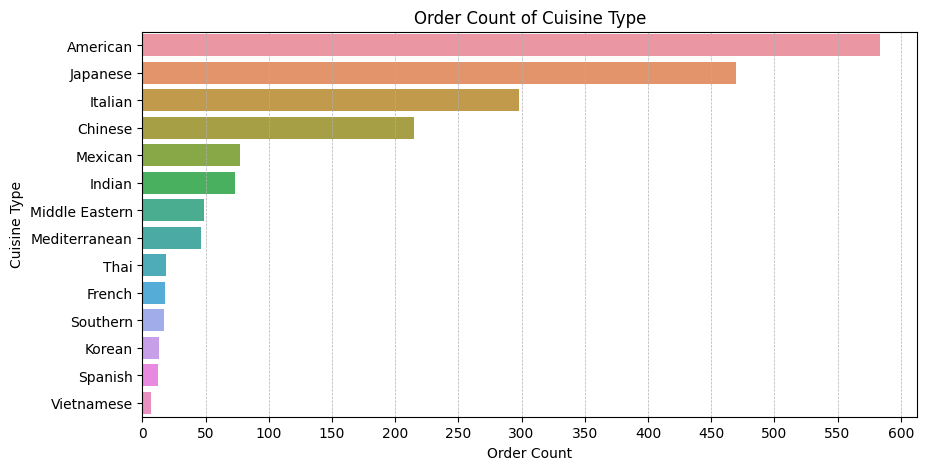

In [36]:
# using barplot to display distribution of cuisine type
plt.figure(figsize=(10, 5))
sns.barplot(data=fd1, y='cuisine_type', x='count')
plt.xlabel('Order Count')
plt.ylabel('Cuisine Type')
plt.xticks(np.arange(0,650,50))
plt.title('Order Count of Cuisine Type')
plt.grid(axis='x', linestyle='--', linewidth=0.5)
plt.show()

Nice! Just to add more detail lets go ahead and include the numerical values at the end of each bar.

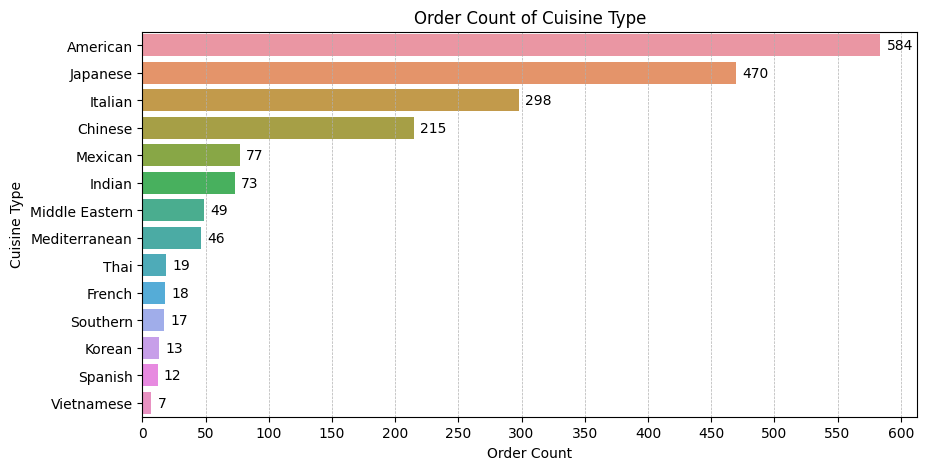

In [37]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=fd1, y='cuisine_type', x='count')
plt.xlabel('Order Count')
plt.ylabel('Cuisine Type')
plt.xticks(np.arange(0,650,50))
plt.title('Order Count of Cuisine Type')
plt.grid(axis='x', linestyle='--', linewidth=0.5)

# Add data points at the end of the bars
for i, value in enumerate(fd1['count']):
    ax.text(value + 5, i, str(value), va='center')

plt.show()

NOTE: We can also provide an alternative view by making our bars horizontal. To do this we will include '**plt.xticks(rotation=90)**'.

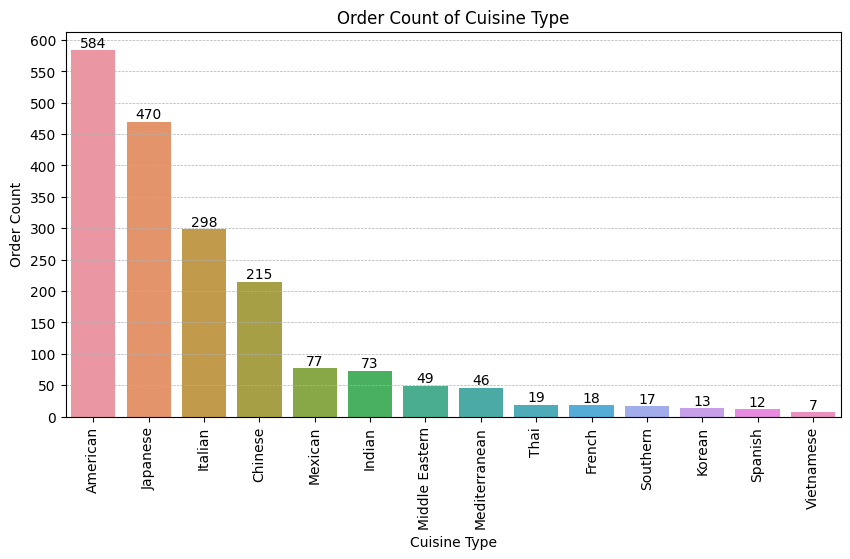

In [38]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=fd1, x='cuisine_type', y='count')
plt.xlabel('Cuisine Type')
plt.ylabel('Order Count')
plt.yticks(np.arange(0, 650, 50))
plt.title('Order Count of Cuisine Type')
plt.grid(axis='y', linestyle='--', linewidth=0.5)

# Add data points at the end of the bars
for i, value in enumerate(fd1['count']):
    ax.text(i, value + 5, str(value), ha='center')

plt.xticks(rotation=90)
plt.show()

In [39]:
# using value counts normalize to get percentage distribution
fd['cuisine_type'].value_counts(normalize=True)*100

cuisine_type
American         30.77
Japanese         24.76
Italian          15.70
Chinese          11.33
Mexican           4.06
Indian            3.85
Middle Eastern    2.58
Mediterranean     2.42
Thai              1.00
French            0.95
Southern          0.90
Korean            0.68
Spanish           0.63
Vietnamese        0.37
Name: proportion, dtype: float64

**It appears that American (30.7%) is the most preferred cuisine followed by Japenese (24.7%) and Italian (15.7%) is at 3rd place. Vietnamese (0.3%) is least ordered cuisine.**

### Analyzing cost of orders

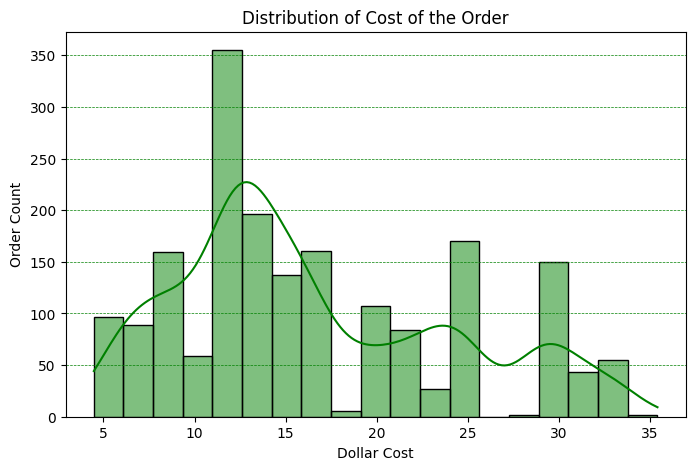

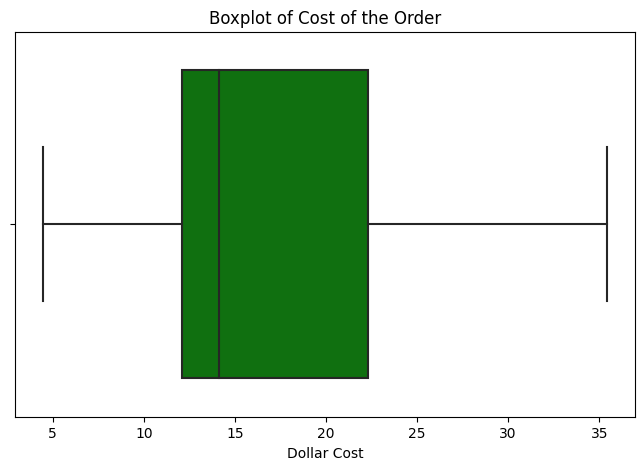

In [40]:
# Analysing cost of orders

# checking histogram for cost of order
plt.figure(figsize=(8,5))
sns.histplot(data=fd, x='cost_of_the_order', kde=True, color='green')
plt.xlabel('Dollar Cost')
plt.ylabel('Order Count')
plt.title('Distribution of Cost of the Order')
plt.grid(axis = 'y', color = 'green', linestyle = '--', linewidth = 0.5)
plt.show()

#checking boxplot for cost of order
plt.figure(figsize=(8,5))
sns.boxplot(data=fd, x='cost_of_the_order', color='green')
plt.xlabel('Dollar Cost')
plt.title('Boxplot of Cost of the Order')
plt.show()

In [41]:
# checking describe to get numerical summary
fd.cost_of_the_order.describe()

count   1898.00
mean      16.50
std        7.48
min        4.47
25%       12.08
50%       14.14
75%       22.30
max       35.41
Name: cost_of_the_order, dtype: float64

- The data appears to be consistent, meaning no anomalies.
- The KDE line in Histogram and Boxplot indicate skewness towards right.
- The Boxplot shows the Median order cost is approx 14 dollars, while Mean is at 16.5 dollars. Additionally, there are no outliers.

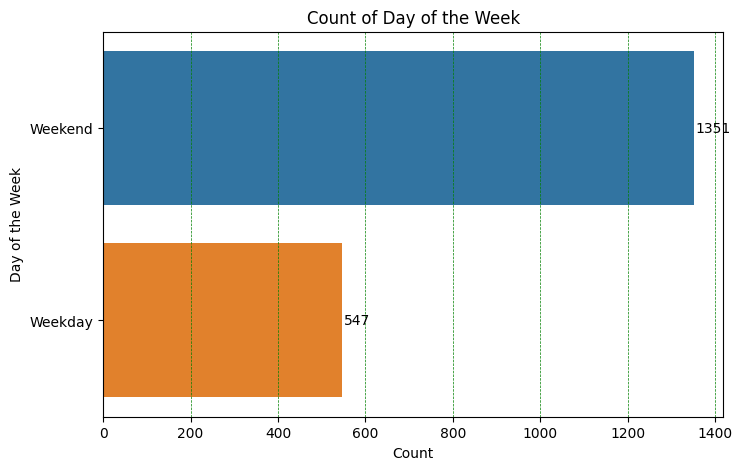

In [42]:
# Checking count plot of day of the week
plt.figure(figsize=(8,5))
ax = sns.countplot(data=fd, y='day_of_the_week')
plt.xlabel('Count')
plt.ylabel('Day of the Week')
plt.title('Count of Day of the Week')
plt.grid(axis='x', color='green', linestyle='--', linewidth=0.5)

# Add numbers at the end of each bar
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.text(x + width + 5, y + height / 2, int(width), ha='left', va='center')

plt.show()

In [43]:
# using value counts normalize to get percentage distribution
fd.day_of_the_week.value_counts(1)*100

day_of_the_week
Weekend   71.18
Weekday   28.82
Name: proportion, dtype: float64

- There are almost 71% orders on weekend and almost 29% orders on weekdays, which clearly indicate the fact that **Weekends** are very important for business.

#### Analyzing ratings


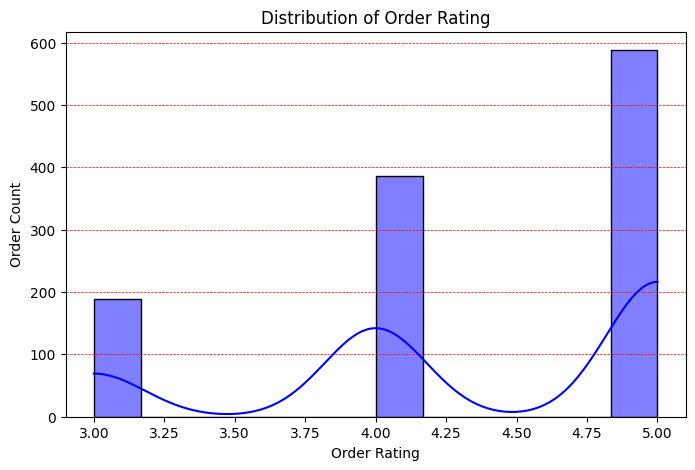

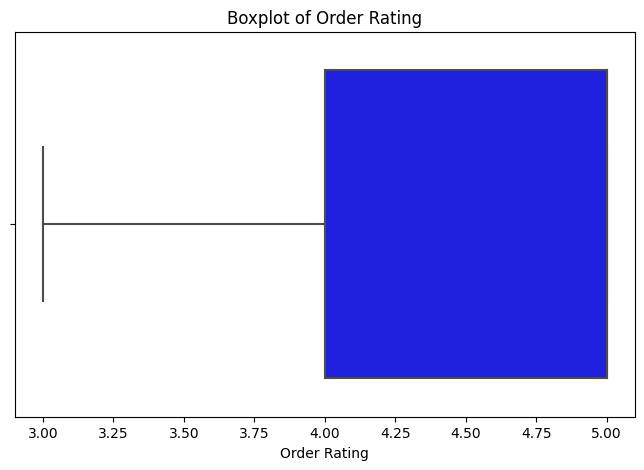

In [44]:
# Analysing rating

# checking histogram for cost of order
plt.figure(figsize=(8,5))
sns.histplot(data=fd, x='rating_new', kde=True, color='blue')
plt.xlabel('Order Rating')
plt.ylabel('Order Count')
plt.title('Distribution of Order Rating')
plt.grid(axis = 'y', color = 'red', linestyle = '--', linewidth = 0.5)
plt.show()

#checking boxplot for cost of order
plt.figure(figsize=(8,5))
sns.boxplot(data=fd, x='rating_new', color='blue')
plt.xlabel('Order Rating')
plt.title('Boxplot of Order Rating')
plt.show()

**75% of the order ratings are between 4 and 5, with mean = 4.34**

#### Analyzing food prepartion time


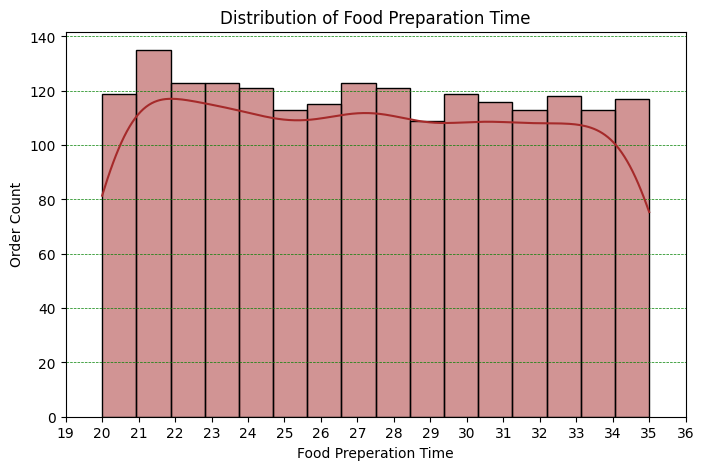

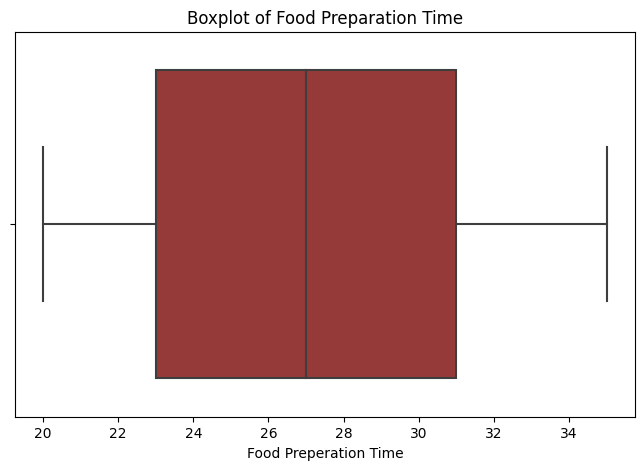

In [45]:
# Analysing food preperation time

# checking histogram for food preparation time
plt.figure(figsize=(8,5))
sns.histplot(data=fd, x='food_preparation_time', bins=16, color='brown', kde=True)
plt.xlabel('Food Preperation Time')
plt.ylabel('Order Count')
plt.title('Distribution of Food Preparation Time')
plt.xticks(np.arange(19,37,1))
plt.grid(axis = 'y', color = 'green', linestyle = '--', linewidth = 0.5)
plt.xlim(19,36)
plt.show()

# checking boxplot for food preparation time
plt.figure(figsize=(8,5))
sns.boxplot(data=fd, x='food_preparation_time', color='brown')
plt.xlabel('Food Preperation Time')
plt.title('Boxplot of Food Preparation Time')
plt.show()

In [46]:
# checking describe to get numerical summary
fd.food_preparation_time.describe()

count   1898.00
mean      27.37
std        4.63
min       20.00
25%       23.00
50%       27.00
75%       31.00
max       35.00
Name: food_preparation_time, dtype: float64

- The data appears to be consistent, meaning no anomalies. 
- 50% of food orders have a prep time of 23-31 mins.
- Min food preparation time is 20 mins while max is 35 mins.
- Median food preparation time is approx 27.0 mins, while Mean is at 27.3 mins.

#### Analyzing delivery time

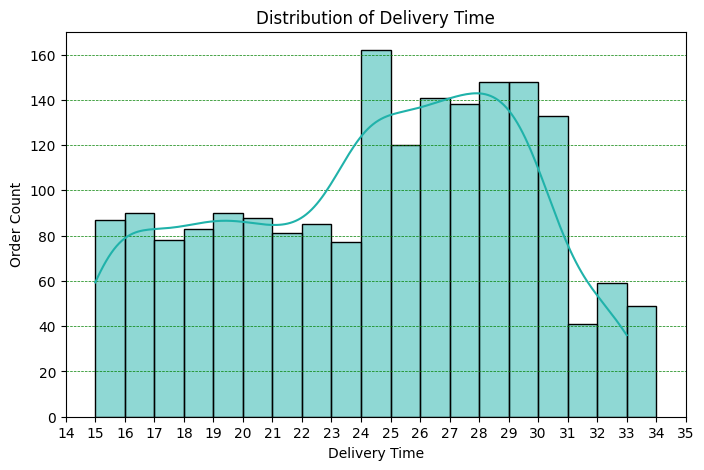

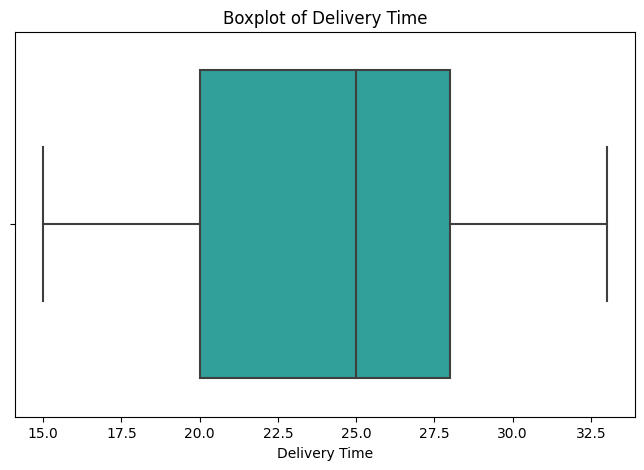

In [47]:
# Analysing delivery time

# checking histogram of delivery time to check distribution
plt.figure(figsize=(8,5))
sns.histplot(data=fd, x='delivery_time', binrange=(15,34), binwidth=1, kde=True, color='lightseagreen')
plt.xlabel('Delivery Time')
plt.xticks(np.arange(14,36,1))
plt.ylabel('Order Count')
plt.title('Distribution of Delivery Time')
plt.grid(axis = 'y', color = 'green', linestyle = '--', linewidth = 0.5)
plt.show()

#checking boxplot of delivery time to check distribution
plt.figure(figsize=(8,5))
sns.boxplot(data=fd, x='delivery_time', color='lightseagreen')
plt.xlabel('Delivery Time')
plt.title('Boxplot of Delivery Time')
plt.show()

In [48]:
# checking describe to get numerical summary
fd.delivery_time.describe()

count   1898.00
mean      24.16
std        4.97
min       15.00
25%       20.00
50%       25.00
75%       28.00
max       33.00
Name: delivery_time, dtype: float64

- The data appears to be consistent, meaning no anomalies.
- 50% of the orders have delivery time between 20-28 mins.
- Min food preparation time is 15 mins while max is 33 mins.
- Median delivery time is approx 25.0 mins, while Mean is at 24.1 mins.

Let's check which are the top 5 restaurants in terms of the number of orders received:

In [49]:
# storing the name of top 5 restaurants 
top5_restaurant_names = fd['restaurant_name'].value_counts().reset_index().iloc[0:5,0]

# creating a seperate dataframe of top 5 restaurants
fd_top5_restaurants = fd[fd['restaurant_name'].isin(top5_restaurant_names)]

# displaying top 5 restaurants
fd['restaurant_name'].value_counts().iloc[0:5]

restaurant_name
Shake shack                  219
The meatball shop            132
Blue ribbon sushi            119
Blue ribbon fried chicken     96
Parm                          68
Name: count, dtype: int64

Let's check which is the most popular cuisine on weekends:

In [50]:
### Checking top 5 most ordered cuisines, using frame slicing, value count of cusine, and iloc

fd[fd.day_of_the_week == 'Weekend'].cuisine_type.value_counts().iloc[0:5]

cuisine_type
American    415
Japanese    335
Italian     207
Chinese     163
Mexican      53
Name: count, dtype: int64

Let's check which is the most popular cuisine on weekdays:

In [51]:
### Checking top 5 most ordered cuisines, using frame slicing, value count of cusine, and iloc

fd[fd.day_of_the_week == 'Weekday'].cuisine_type.value_counts().iloc[0:5]

cuisine_type
American    169
Japanese    135
Italian      91
Chinese      52
Mexican      24
Name: count, dtype: int64

Looks like customers' cusine type preferences do not change across weekdays or weekends.

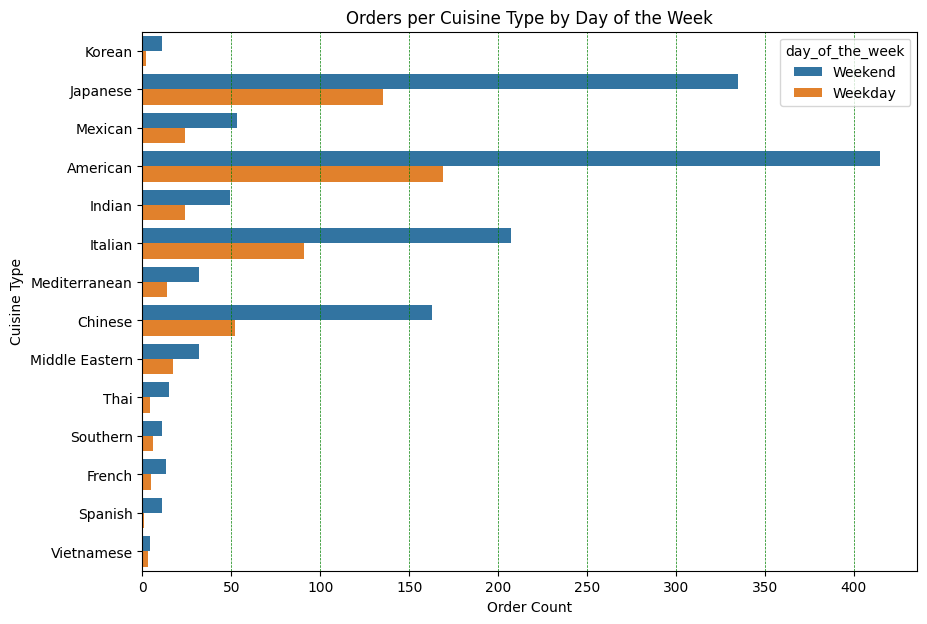

In [52]:
# using barplot to display distribution of cuisine type
plt.figure(figsize=(10,7))
sns.countplot(data=fd, y='cuisine_type', hue='day_of_the_week')
plt.xlabel('Order Count')
plt.ylabel('Cuisine Type')
plt.title('Orders per Cuisine Type by Day of the Week')
plt.grid(axis = 'x', color = 'green', linestyle = '--', linewidth = 0.5)
plt.show()

The value counts and graph clearly tells us that **American** is the most popular cuisine on weekend with 415 orders.
We can also note that, across all the cuisine types, orders on weekend are more than orders on weekday.

Let's check what percentage of the orders cost more than 20 dollars:

In [53]:
# using conditional frame slicing and count to calculate percentage and then round to 2 digits
print('The percentage of orders that cost more than 20 dollars = ',
      round(
          fd[fd.cost_of_the_order > 20].cost_of_the_order.count() /
          fd.cost_of_the_order.count() * 100,
          ndigits=2
      )
)

# using conditional frame slicing and count to calculate percentage and then round to 2 digits
print('The percentage of orders that cost less than 20 dollars = ',
      round(
          fd[fd.cost_of_the_order < 20].cost_of_the_order.count() /
          fd.cost_of_the_order.count() * 100,
          ndigits=2
      )
)

The percentage of orders that cost more than 20 dollars =  29.24
The percentage of orders that cost less than 20 dollars =  70.76


The percentage of orders that cost more than 20 dollars = 29.24%

Let's find the IDs of repeat customers and the number of orders they placed.

In [54]:
# storing the top 5 customer ids using value counts on customer_id column, resetting index and slicing top 5 records of first column  
top5_customer_ids = fd.customer_id.value_counts().reset_index().iloc[0:5,0]

# using value counts on customer_id column to get number of orders placed by each customer_id
# and then storing it in a new dataframe after reseting index and slicing the top 5 records
fd1 = fd.customer_id.value_counts().reset_index().iloc[0:5]

# changing column names for diplay purpose and the display
fd1.rename(columns={'order_count': 'customer_id', 'count': 'order_count'}, inplace=True)
fd1

,customer_id,order_count
0,52832,13
1,47440,10
2,83287,9
3,250494,8
4,259341,7


- Top 5 customer ids are shown above with their respective order counts


Before we start our Multivariate Analysis, we will create a dataframe, Cuisine Type, Restaturant Name, with their order count and their respective averages for **1) cost of order, 2) rating, 3) food preparation time and 4) delivery time**. This will help us generalise the analysis and to look at the dataset at high-level. Later on we can drill down and investigate deeper into specifics.

In [55]:
# checking number of restaurants for each cuisine types

# for this analysis and for multivariate analysis we will use dataframe with imputed ratings
fd = fd_modified_rating.copy()

# creating a dataframe groupby cuisine type and restaurant name and getting count of their respective orders, then sorting and reseting index
fd1 = fd.groupby(['cuisine_type','restaurant_name'])['order_id'].count().sort_values(ascending=False).reset_index()

# creating a dataframe groupby restaurant name and getting mean of their respective ratings, then reseting index
fd2 = fd.groupby(['restaurant_name'])['rating_new'].mean().reset_index()

# creating a dataframe groupby restaurant name and getting mean of their respective cost of order, then reseting index
fd3 = fd.groupby(['restaurant_name'])['cost_of_the_order'].mean().reset_index()

# creating a dataframe groupby restaurant name and getting mean of their respective food preperation time, then reseting index
fd4 = fd.groupby(['restaurant_name'])['food_preparation_time'].mean().reset_index()

# creating a dataframe groupby restaurant name and getting mean of their respective delivery time, then reseting index
fd5 = fd.groupby(['restaurant_name'])['delivery_time'].mean().reset_index()

# creating a dataframe merging all the information from previous dataframes
fd6 = pd.merge(fd1,fd2,how='left',on='restaurant_name')
fd6 = pd.merge(fd6,fd3,how='left',on='restaurant_name')
fd6 = pd.merge(fd6,fd4,how='left',on='restaurant_name')
fd6 = pd.merge(fd6,fd5,how='left',on='restaurant_name')

# renaming a few columns in the final dataframe
fd6.rename(columns={'order_id': 'order_count',
                    'rating_new':'avg_rating_new',
                    'cost_of_the_order':'avg_cost_of_the_order',
                    'food_preparation_time':'avg_food_preparation_time',
                    'delivery_time':'avg_delivery_time'},
           inplace=True)

# adding a column for order completion time which is sum of avg food preparation and avg delivry time
fd6['order_completion_time'] = fd6['avg_food_preparation_time'] + fd6['avg_delivery_time']

fd6.head()

,cuisine_type,restaurant_name,order_count,avg_rating_new,avg_cost_of_the_order,avg_food_preparation_time,avg_delivery_time,order_completion_time
0,American,Shake shack,219,4.28,16.34,27.95,24.66,52.61
1,Japanese,Blue ribbon sushi,119,4.22,16.00,27.92,23.94,51.87
2,Italian,The meatball shop,112,4.51,16.25,27.18,24.24,51.42
3,American,Blue ribbon fried chicken,96,4.33,17.32,27.20,24.15,51.34
4,Italian,Parm,68,4.13,16.36,27.31,25.50,52.81


## Multivariate Analysis

Let's perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

Lets start our analysis with Cuisine Types and Restaurants

In [56]:
# checking how many restaurants serve multiple cuisine types
fd.groupby(['restaurant_name'])['cuisine_type'].nunique().sort_values(ascending=False).head(10)

restaurant_name
The meatball shop            2
P.j. clarke's                1
Parm                         1
Paul & jimmy's               1
Pepe giallo                  1
Pepe rosso to go             1
Philippe chow                1
Piccolo angolo               1
Pinto nouveau thai bistro    1
Pongsri thai                 1
Name: cuisine_type, dtype: int64

All restaurants only serve 1 cuisine type, except "The meatball shop", which serves 2.
Now let's check how many number of Restaurants per Cuisine...

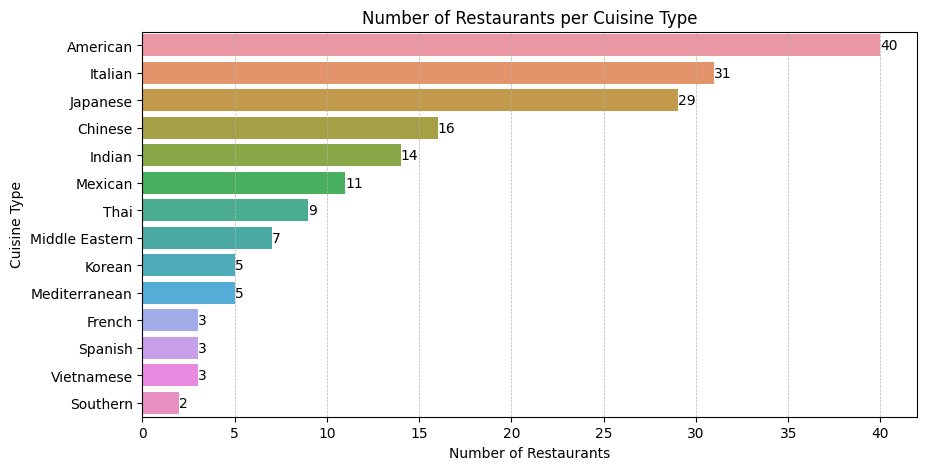

,cuisine_type,restaurant_count
0,American,40
1,Italian,31
2,Japanese,29
3,Chinese,16
4,Indian,14


In [57]:
# checking how many restaurants per cuisine types
fd1 = fd.groupby(['cuisine_type'])['restaurant_name'].nunique().sort_values(ascending=False).reset_index()
fd1.rename(columns={'restaurant_name': 'restaurant_count'}, inplace=True)

# checking barplot of number of restaurants per cuisine
plt.figure(figsize=(10,5))
ax = sns.barplot(data=fd1, y='cuisine_type', x='restaurant_count')
sns.barplot(data=fd1, y='cuisine_type', x='restaurant_count')
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisine Type')
plt.title('Number of Restaurants per Cuisine Type')
plt.grid(axis = 'x', linestyle = '--', linewidth = 0.5)

# Add data points at the end of the bars
for i, value in enumerate(fd1['restaurant_count']):
    ax.text(value, i, str(value), va='center')

plt.show()
fd1.head()

It appears that American Cuisine has the most number of restaurants, followed by Italian and Japanese.
Now let's check the order count per cuisine and cross reference it with number of restaurants per cuisine, which could tell us average order per restaurant per cuisine.

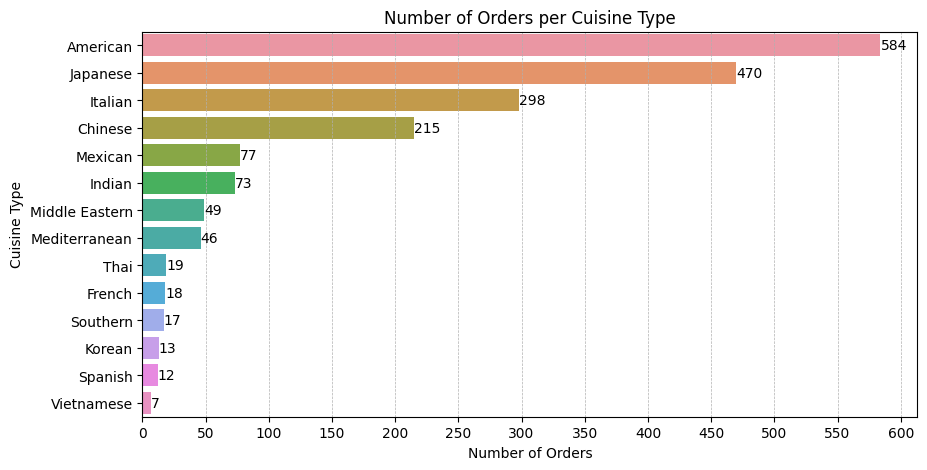

,cuisine_type,order_count
0,American,584
1,Japanese,470
2,Italian,298
3,Chinese,215
4,Mexican,77


In [58]:
# checking order count per cuisine
fd2 = fd.groupby(['cuisine_type'])['order_id'].nunique().sort_values(ascending=False).reset_index()
fd2.rename(columns={'order_id': 'order_count'}, inplace=True)

# checking barplot of order count vs cuisines
plt.figure(figsize=(10,5))
ax = sns.barplot(data=fd2, y='cuisine_type', x='order_count')
sns.barplot(data=fd2, y='cuisine_type', x='order_count')
plt.xlabel('Number of Orders')
plt.ylabel('Cuisine Type')
plt.xticks(np.arange(0,650,50))
plt.title('Number of Orders per Cuisine Type')
plt.grid(axis = 'x', linestyle = '--', linewidth = 0.5)

# Add data points at the end of the bars
for i, value in enumerate(fd2['order_count']):
    ax.text(value, i, str(value), va='center')

plt.show()
fd2.head()

It appears that American Cuisine has the most number of orders, followed by Japanese and Italian.
Another noticeable things is that although Japanese had 3rd most number of restaurants, it has 2nd most number of orders.
Now we will also add avg. rating per cuisine

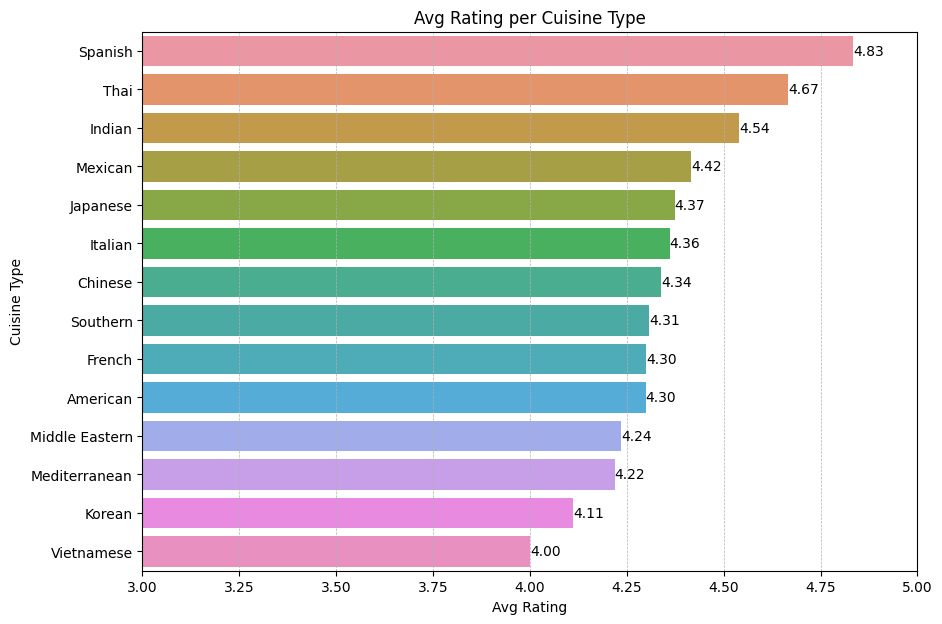

,cuisine_type,rating_new
0,Spanish,4.83
1,Thai,4.67
2,Indian,4.54
3,Mexican,4.42
4,Japanese,4.37


In [59]:
# computing avg rating per cuisine type using original rating dataframe
fd4 = fd_original_file.groupby(['cuisine_type'])['rating_new'].mean().sort_values(ascending=False).reset_index()

# checking barplot of avg rating per cuisine type 
plt.figure(figsize=(10,7))
ax = sns.barplot(data=fd4, y='cuisine_type', x='rating_new')
sns.barplot(data=fd4, y='cuisine_type', x='rating_new')
plt.xlabel('Avg Rating')
plt.ylabel('Cuisine Type')
plt.xlim(3,5)
plt.xticks(np.arange(3,5.25,.25))
plt.title('Avg Rating per Cuisine Type')
plt.grid(axis = 'x', linestyle = '--', linewidth = 0.5)

# Add data points at the end of the bars
for i, value in enumerate(fd4['rating_new']):
    ax.text(value, i, f'{value:.2f}', va='center')
plt.show()

fd4.head()

So now let's merge the dataframes and also calculate No. of restaurants and No. of orders per cuisine, and get avg. order per restaurant per cuisine

In [60]:
# using merge to combine dataframes
fd3 = pd.merge(fd1,fd2,how='left',on='cuisine_type')
fd3 = pd.merge(fd3,fd4,how='left',on='cuisine_type')

# creating another column giving avg order count per restaurant per cuisine
fd3['avg_order_per_restaurant'] = fd3['order_count'] / fd3['restaurant_count']
fd3.sort_values(by='order_count', ascending=False)

,cuisine_type,restaurant_count,order_count,rating_new,avg_order_per_restaurant
0,American,40,584,4.30,14.60
2,Japanese,29,470,4.37,16.21
1,Italian,31,298,4.36,9.61
3,Chinese,16,215,4.34,13.44
5,Mexican,11,77,4.42,7.00
4,Indian,14,73,4.54,5.21
7,Middle Eastern,7,49,4.24,7.00
9,Mediterranean,5,46,4.22,9.20
6,Thai,9,19,4.67,2.11
10,French,3,18,4.30,6.00


- Spanish, Thai and Indian, are top 3 highly rated cuisines. As we know, American restaurants were the most available but interestingly our data shows it is not the even top 3 in terms of hihgly rated cuisine types.
- Thai has 2nd highest ratings but lowest number avg order per restaurant, which indicates that its restaurant list needs to be optimized.
- Japanese has the highest avg order count per restaurant meaning most of the restaurants in this cuisine are getting good orders.
- American, Japanese, Italian and chinese are the best performing cuisines in terms of orders/revenue.<br>
<br>

In this case, it would be beneficial to add more Spanish, Thai, and Indian restaurants as there is a still potential profits that can captured in these markets.

**It appears that some cuisines have higher average order count per restaurant, meaning while having lower number of restaurants those cuisines get more orders. This could indicate that if more restaurants are added of those cuisines, they could increase the orders of their respective cuisines significantly. Alternatively, it could also indicate that some restaurants of those cuisines are very popular and get significantly higher number of orders than others. To check the scenario of such cusisines, the restaurants have to be analyzed for that cuisine, so as to check if any of them have significantly lower order count compared to respective average. If that is the case, then we need to further drill down and investigate, what could be possible causes. For this analysis, we will choose Japanses and Mediterranean cuisines**

In [61]:
# checking Mediterranean cuisine
fd6[fd6.cuisine_type == 'Mediterranean']

,cuisine_type,restaurant_name,order_count,avg_rating_new,avg_cost_of_the_order,avg_food_preparation_time,avg_delivery_time,order_completion_time
18,Mediterranean,Jack's wife freda,25,4.32,16.67,27.72,22.72,50.44
49,Mediterranean,Mamoun's falafel,7,4.25,11.82,25.86,24.86,50.71
54,Mediterranean,Barbounia,6,4.50,12.49,28.33,23.50,51.83
70,Mediterranean,Pylos,5,3.50,18.85,25.80,26.80,52.60
102,Mediterranean,Olea,3,4.00,14.37,23.00,22.67,45.67


In Mediterranean cuisine, we see that there is 1 very popular restaurant, **Jack's wife freds**, with 25 orders, and then a bunch of restaurants which have 7 orders or less. For most of them, ratings and delivery times, seems fine except for Pylos whose rating is not ideal (3.50).

In [62]:
# checking Japanese cuisine
fd6[fd6.cuisine_type == 'Japanese']

,cuisine_type,restaurant_name,order_count,avg_rating_new,avg_cost_of_the_order,avg_food_preparation_time,avg_delivery_time,order_completion_time
1,Japanese,Blue ribbon sushi,119,4.22,16.00,27.92,23.94,51.87
7,Japanese,Tao,49,4.36,17.03,26.78,23.16,49.94
9,Japanese,Blue ribbon sushi bar & grill,44,4.59,15.15,26.30,23.41,49.70
10,Japanese,Nobu next door,42,4.35,14.85,27.76,24.57,52.33
12,Japanese,Sushi of gari 46,37,4.24,17.32,27.54,25.97,53.51
13,Japanese,Momoya,30,4.27,16.40,27.30,25.13,52.43
14,Japanese,Blue ribbon sushi izakaya,29,4.33,16.73,28.72,23.48,52.21
19,Japanese,Sushi of gari tribeca,24,4.62,15.66,28.12,23.75,51.88
23,Japanese,Yama japanese restaurant,18,4.50,14.25,26.94,24.06,51.00
27,Japanese,Sushi of gari,16,4.71,18.20,28.19,21.94,50.12


Looking at Japanese cuisine, we can see that there are quite a few restaurants which produce good number of orders, and some restaurants which only bring about 3 orders or less (14 restaurants). So in both the examples, we notice that some restaurants in each cuisine are very popular and fetch high number of orders, but there are also few restaurants underperforming. To improve customer experience, the app can implement an option where users can search restaurants with the highest orders placed.

If the app only allows for filters with high rating, this could mean a low performing restaurant (such as Taro Sushi) would appear in the top search; this could potentially raise profits for low performing restaurants or it can also lead to disappointed customers if these restaurants do not make quality food. Another solution to consider for these restaurants is giving these restaurants promotion offers to customers; this may offset order count and satisfy more customers.

Lastly, if these solutions do not change order count for low performing restaurants it might be best to discard such restaurants. We will assume the following criteria:

- Restaurants with lowest number of orders (less than 5)
- Restaurants with lowest mean ratings (less than 3.75)

In [63]:
# restaurants with lowest number of orders
fd_low_order_restaurants = fd6[fd6.order_count < 5]

# restaurants with low average ratings
fd_low_rated_restaurants = fd6[fd6.avg_rating_new < 3.75]

# now inner merge the dataframes to find common restaurants
fd_discard_restaurants = pd.merge(fd_low_order_restaurants, fd_low_rated_restaurants, how='inner')

fd_discard_restaurants

,cuisine_type,restaurant_name,order_count,avg_rating_new,avg_cost_of_the_order,avg_food_preparation_time,avg_delivery_time,order_completion_time
0,American,Blue ribbon brooklyn,4,3.33,16.53,27.25,23.50,50.75
1,American,The odeon,3,3.50,11.17,31.67,23.67,55.33
2,Japanese,Go! go! curry!,3,3.50,22.41,22.00,23.67,45.67
3,Japanese,Terakawa ramen,3,3.50,14.26,26.67,22.33,49.00
4,Korean,Don's bogam bbq & wine bar,3,3.50,12.97,30.00,20.67,50.67
5,Middle Eastern,Byblos restaurant,2,3.00,24.73,32.50,18.00,50.50
6,Indian,Haveli indian restaurant,2,3.00,17.41,23.50,25.00,48.50
7,American,Brgr,2,3.00,9.89,25.00,25.00,50.00
8,Vietnamese,Nha trang one,1,3.00,15.67,23.00,24.00,47.00
9,American,Sarabeth's west,1,3.00,14.12,21.00,33.00,54.00


For now, based on our criteria, we'll be recommending to remove the above restaurants.

**Now let's check Cuisine vs Avg. cost of Order (per day of the week)**



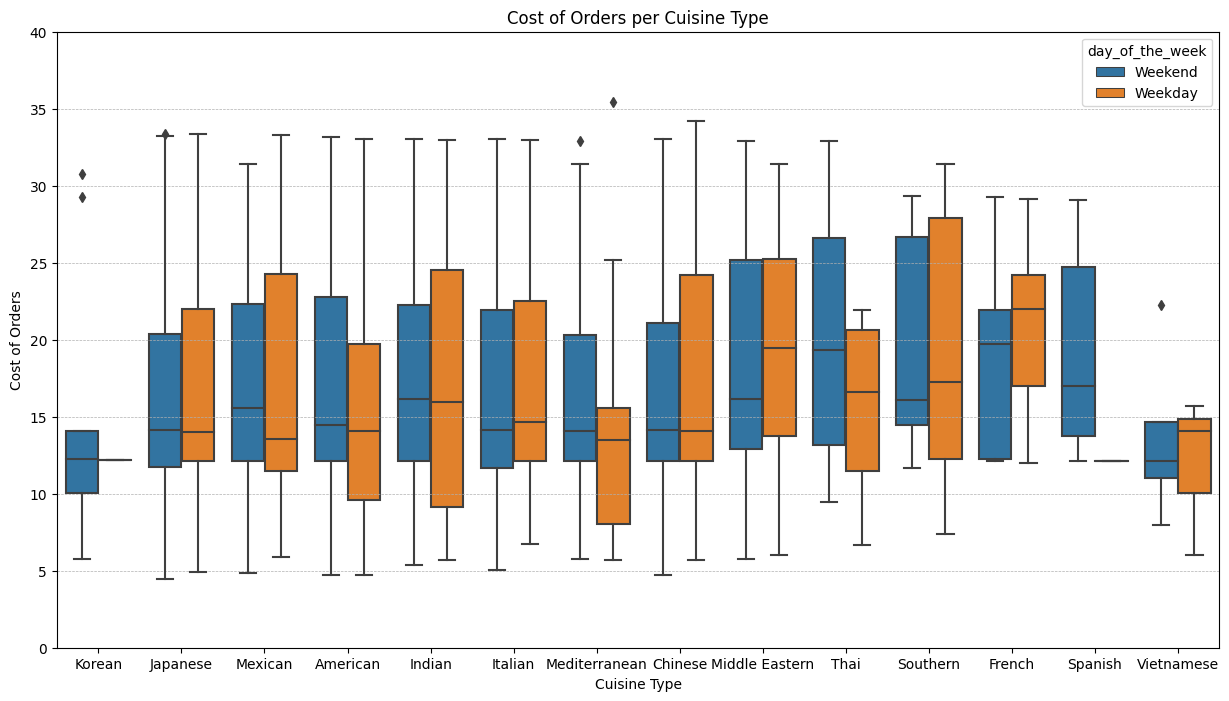

In [64]:
# checking average cost of order per cuisine

plt.figure(figsize=(15,8))
sns.boxplot(data=fd, y='cost_of_the_order', x='cuisine_type', hue='day_of_the_week')
plt.ylabel('Cost of Orders')
plt.xlabel('Cuisine Type')
plt.yticks(np.arange(0,45,5))
plt.title('Cost of Orders per Cuisine Type')
plt.grid(axis = 'y', linestyle = '--', linewidth = 0.5)
plt.show()

- Korean and Vietnamese are the cheapest cuisines, with almost all their orders under 15 dollars.
- Almost all the cuisines have approx 75% of their orders under 25 dollars, except for Southern and Thai (on weekends only).

Lets look closely at order costs of Top5 restaurants having most order counts:

In [65]:
fd.groupby(['day_of_the_week', 'cuisine_type'])['cost_of_the_order'].sum()


day_of_the_week  cuisine_type  
Weekday          American         2587.11
                 Chinese           891.68
                 French            104.33
                 Indian            411.90
                 Italian          1537.00
                 Japanese         2209.69
                 Korean             24.36
                 Mediterranean     196.56
                 Mexican           397.34
                 Middle Eastern    337.16
                 Southern          115.36
                 Spanish            12.13
                 Thai               61.85
                 Vietnamese         35.75
Weekend          American         6943.67
                 Chinese          2613.94
                 French            251.96
                 Indian            823.24
                 Italian          3355.77
                 Japanese         5453.44
                 Korean            157.66
                 Mediterranean     515.28
                 Mexican           906.51
  

In [66]:
fd1 = fd[fd.cuisine_type == 'Japanese']
fd1.groupby(['day_of_the_week'])['cost_of_the_order'].sum()

day_of_the_week
Weekday   2209.69
Weekend   5453.44
Name: cost_of_the_order, dtype: float64

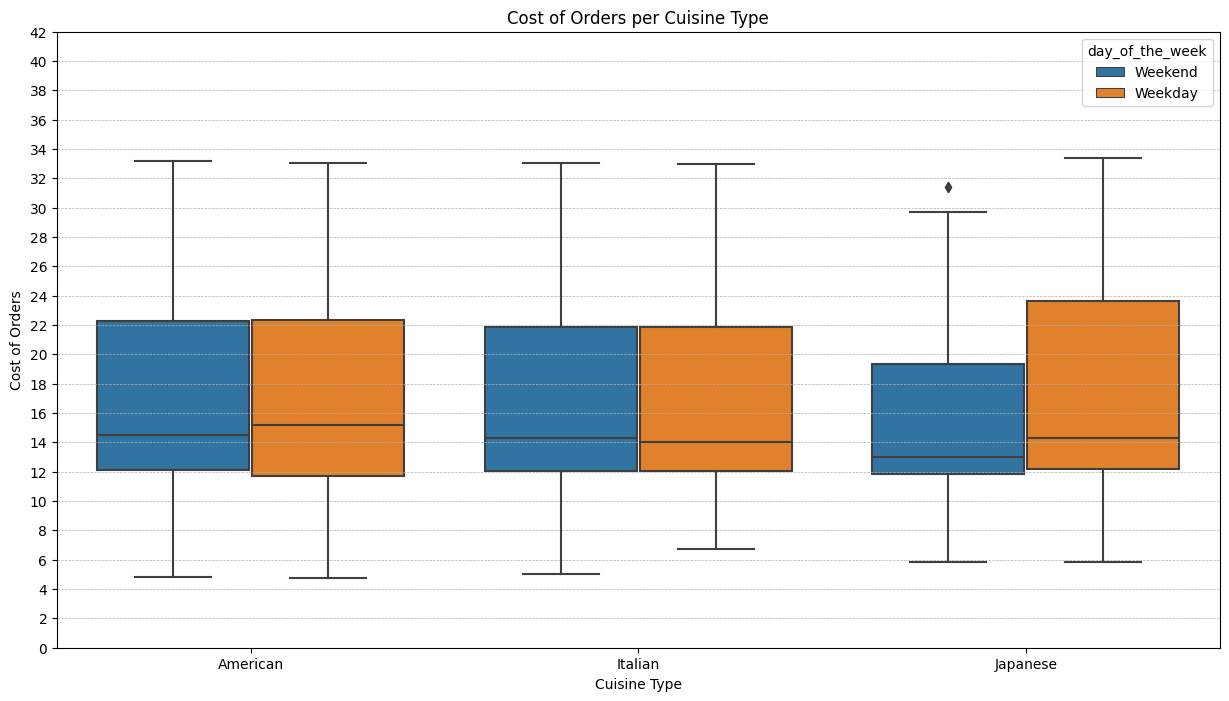

count   634.00
mean     16.41
std       7.34
min       4.75
25%      12.08
50%      14.21
75%      21.93
max      33.37
Name: cost_of_the_order, dtype: float64

In [67]:
# checking average cost of order per cuisine

plt.figure(figsize=(15,8))
sns.boxplot(data=fd_top5_restaurants, y='cost_of_the_order', x='cuisine_type', hue='day_of_the_week')
plt.ylabel('Cost of Orders')
plt.xlabel('Cuisine Type')
plt.yticks(np.arange(0,44,2))
plt.title('Cost of Orders per Cuisine Type')
plt.grid(axis = 'y', linestyle = '--', linewidth = 0.5)
plt.show()

fd_top5_restaurants.cost_of_the_order.describe()

We can observe that Top 5 restaurants (of 3 different cuisine types) having a combined order count of 634 (which is more than 30% of total orders) are having order cost similarities, which are as follows;

- 50% of all orders (in all top5 restaurants) are between the range of 12-24 dollars.
- The mean order price is 16.41 dollars
- The most interesting thing which we can notice is the fact that Japanese restaurants order costs are cheaper on weekends than on weekdays. We also know that Japanese cuisine is ordered more on weekends than on weekdays. We also know that Japanese restaurants have the highest avg order count per restaurant (high no. of order with less no. of restaurants).<br>
<br>
Therefore it is recommended for restaurants to provide discounts on weekends. There is a good chance of increase in sales by doing so.

**Cuisine Type vs. Food Preparation Time (per day of the week)**



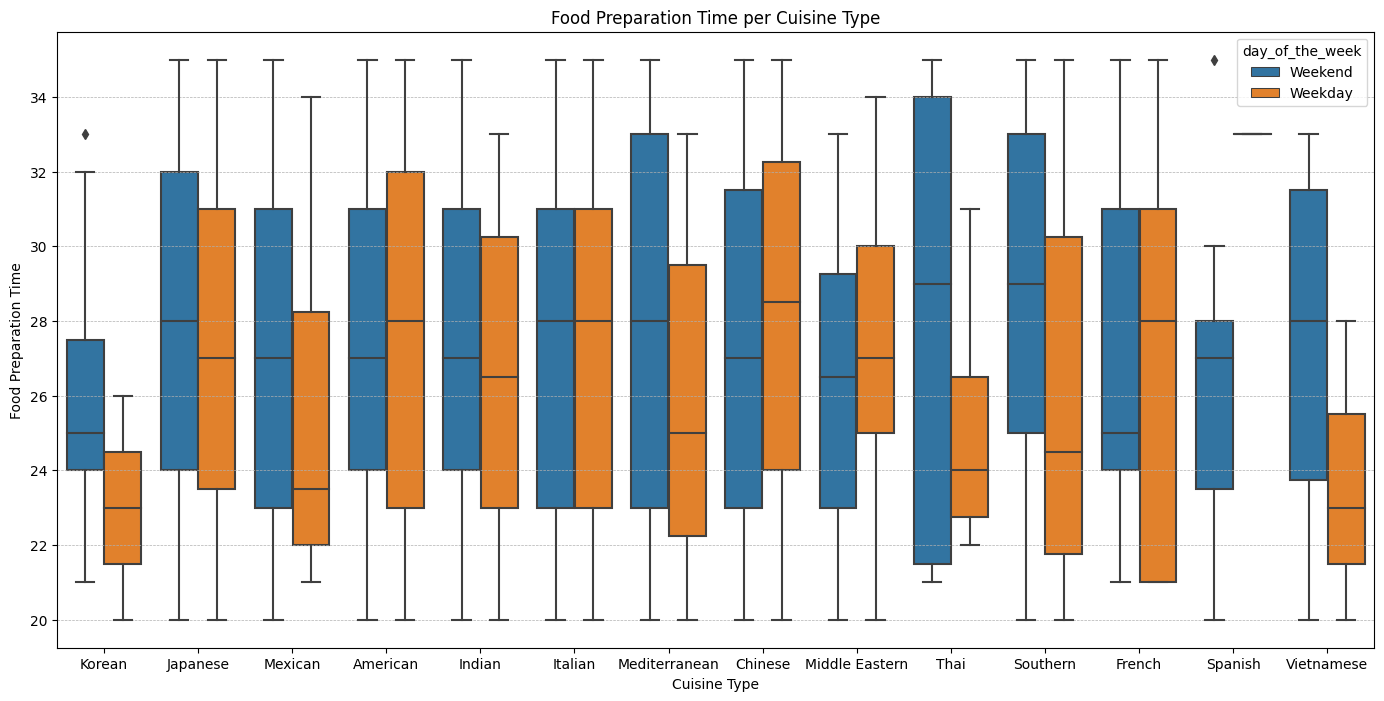

count   1898.00
mean      27.37
std        4.63
min       20.00
25%       23.00
50%       27.00
75%       31.00
max       35.00
Name: food_preparation_time, dtype: float64

In [68]:
plt.figure(figsize=(17,8))
sns.boxplot(data=fd, y='food_preparation_time', x='cuisine_type', hue='day_of_the_week')
plt.ylabel('Food Preparation Time')
plt.xlabel('Cuisine Type')
#plt.yticks(np.arange(30,80,5))
plt.title('Food Preparation Time per Cuisine Type')
plt.grid(axis = 'y', linestyle = '--', linewidth = 0.5)
plt.show()

fd.food_preparation_time.describe()

- Korean is the overall quikest cuisine in terms of food preparation
- Italian is the most consistent in their times on both days of the week
- Approx 50% orders of almost all cuisines are prepared between 22-32 mins.

Lets have a look at the Food preparation time of Top5 most popular restaurants



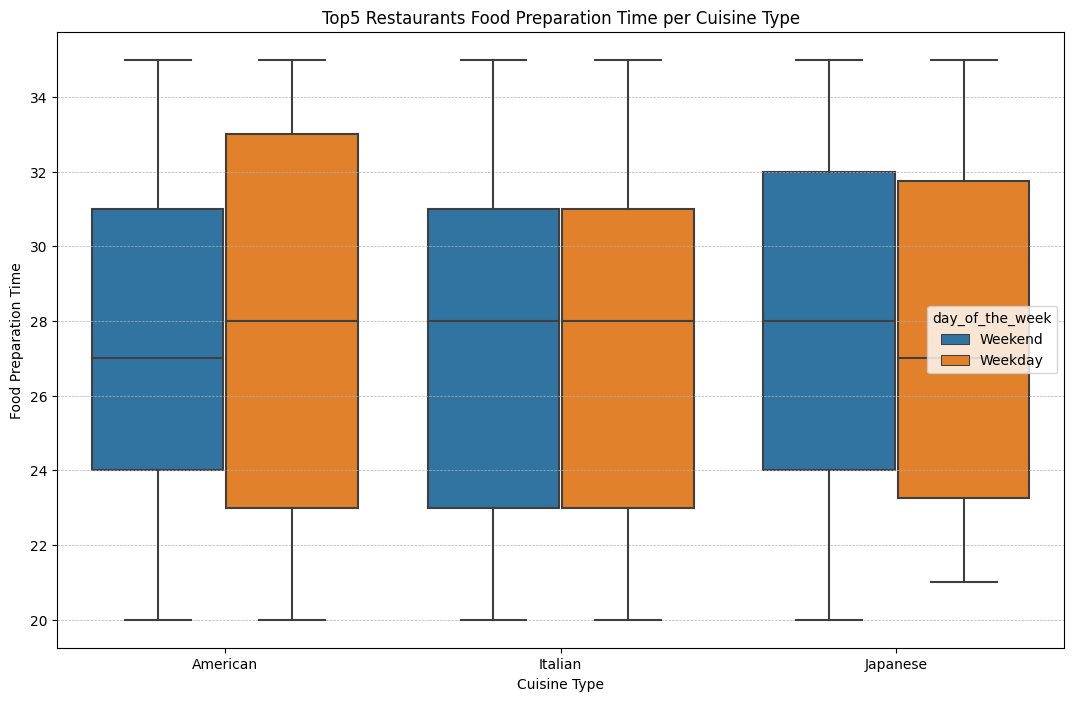

In [69]:
plt.figure(figsize=(13,8))
sns.boxplot(data=fd_top5_restaurants, y='food_preparation_time', x='cuisine_type', hue='day_of_the_week')
plt.ylabel('Food Preparation Time')
plt.xlabel('Cuisine Type')
#plt.yticks(np.arange(30,80,5))
plt.title('Top5 Restaurants Food Preparation Time per Cuisine Type')
plt.grid(axis = 'y', linestyle = '--', linewidth = 0.5)
plt.show()

In the top5 most popular restaurants, almost 50% of the orders are prepared between 22-32 mins, which is almost consistent in comparision with overall no of orders.

- In the case of Top5 most popular restaurants, the delivery timeframe is identical for both days of the week.
- On weekday, 50% orders from almost all cuisines have a delivery time of between 25-32 mins.
- On weekend, the delivery time of 50% orders are reduced and are almost between 17-27 mins

Ratings vs Cuisine Type (per day of the week)



In [70]:
# checking overall cuisine rating and daywise rating 
fd_overall_cuisine_rating = fd.groupby(['cuisine_type'])['rating_new'].mean().sort_values(ascending=False).reset_index()
fd_daywise_cuisine_rating = fd.groupby(['cuisine_type','day_of_the_week'])['rating_new'].mean().reset_index()

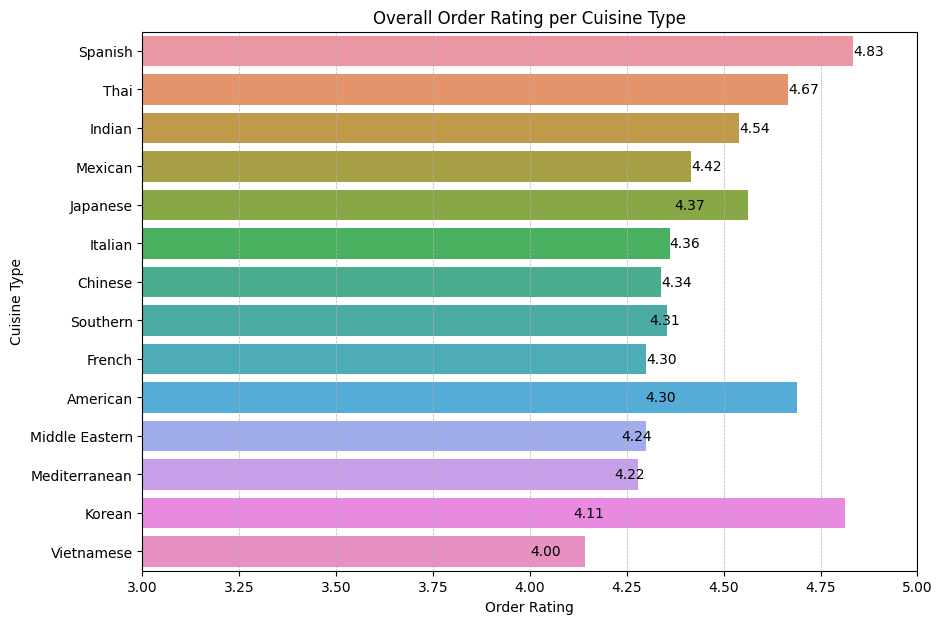

,cuisine_type,rating_new
0,Spanish,4.83
1,Thai,4.67
2,Indian,4.54
3,Mexican,4.42
4,Japanese,4.37


In [71]:
# checking the barplot for overall rating per cuisine 
plt.figure(figsize=(10,7))
sns.barplot(data=fd, y='cuisine_type', x='rating_new', errorbar=('ci', False))
ax = sns.barplot(data=fd4, y='cuisine_type', x='rating_new')
plt.xlabel('Order Rating')
plt.ylabel('Cuisine Type')
plt.xlim(3,5)
plt.xticks(np.arange(3,5.25,.25))
plt.title('Overall Order Rating per Cuisine Type')
plt.grid(axis = 'x', linestyle = '--', linewidth = 0.5)

# Add data points at the end of the bars
for i, value in enumerate(fd4['rating_new']):
    ax.text(value, i, f'{value:.2f}', va='center')
plt.show()

fd4.head()

It appears that Spanish cuisine is highest rated followed by Thai and Indian. Let's check the daywise rating distribution of cuisine

C:\Users\micha\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


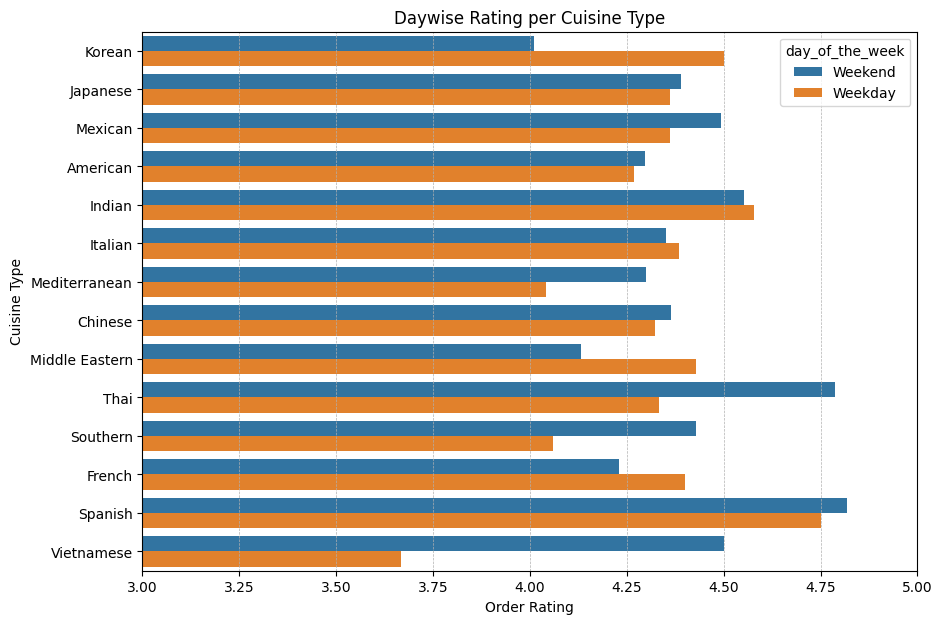

In [72]:
# Checking barplot of daywise rating distribution 
plt.figure(figsize=(10,7))
sns.barplot(data=fd, y='cuisine_type', x='rating_new', hue='day_of_the_week', errorbar=('ci', False))
plt.xlabel('Order Rating')
plt.ylabel('Cuisine Type')
plt.xlim(3,5)
plt.xticks(np.arange(3,5.25,.25))
plt.title('Daywise Rating per Cuisine Type')
plt.grid(axis = 'x', linestyle = '--', linewidth = 0.5)
plt.show()

**Note - May receive a runtime warning for mean of empty slice due to restaurants that have NaN. In this case, we would either have to change these ratings to numeric values or delete them entirely.**

- There is a slight caveat in the chart above, because our imputation of rating values use overall mean ratings of the respective restaurants, whereas if we would've imputed the rating values of restaurants considering the respective day of the week, it would've been more accurate.
- However, we can see that spanish rates highest in both days. Almost all cuisines rate above 4, except for Vietnamese on weekday.
- Let's check ratings of Top5 most popular restaurants

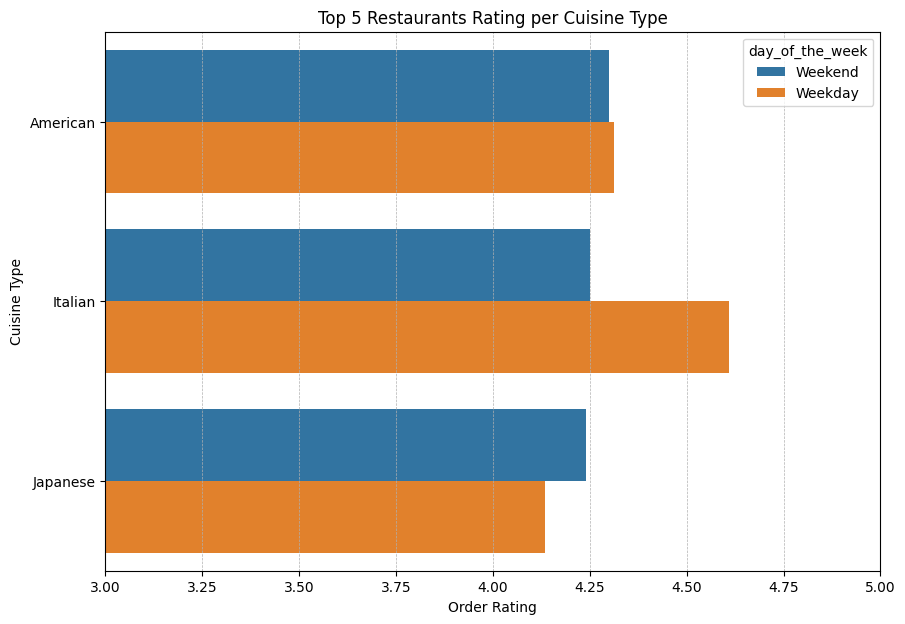

In [73]:
# Checking barplot of daywise rating distribution 
plt.figure(figsize=(10,7))
sns.barplot(data=fd_top5_restaurants, y='cuisine_type', x='rating_new', hue='day_of_the_week', errorbar=('ci', False))
plt.xlabel('Order Rating')
plt.ylabel('Cuisine Type')
plt.xlim(3,5)
plt.xticks(np.arange(3,5.25,.25))
plt.title('Top 5 Restaurants Rating per Cuisine Type')
plt.grid(axis = 'x', linestyle = '--', linewidth = 0.5)
plt.show()

The ratings chart above of Top5 Restaurants, American and Italian cuisine restaurants are consistent with overall ratings of respective cuisines, but Japanese (Top5) restaurant shows a decresed value. It could be because of the caveat mentioned above, or simply because of the fact that low ordered restaurants are rated higher than most ordered restaurants.

Let's check correlation map to see if any correlation is there...



In [74]:
# correlation code

plt.figure(figsize=(15,5))
sns.heatmap(fd.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

ValueError: could not convert string to float: 'Hangawi'

<Figure size 1500x500 with 0 Axes>

In this case, we see a ValueError and it indicates that there was an issue converting a string value to a float. Specifically, the string value 'Hangawi' could not be converted to a float.

In [75]:
# By selecting only the numeric columns, you can avoid the ValueError caused by trying to convert non-numeric values to floats.
numeric_columns = fd.select_dtypes(include='number')

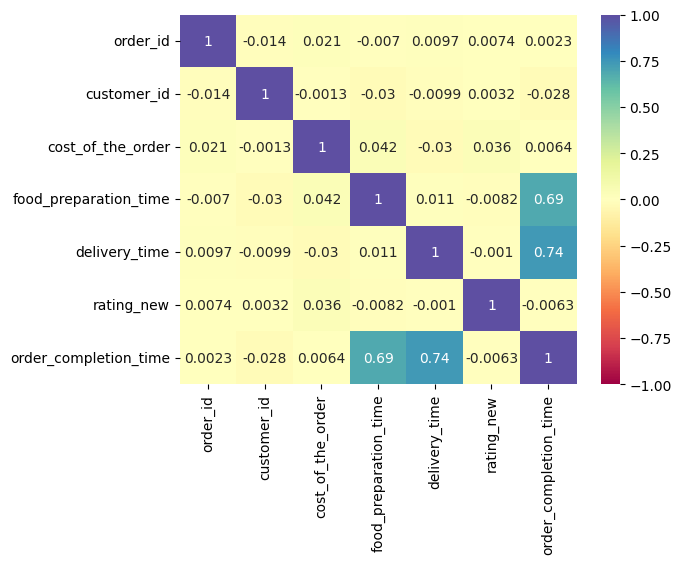

In [76]:
sns.heatmap (numeric_columns.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

Based on our heatmap, the only significant positive correlations are:

- food prep time & order completion time (.69)
- delivery time & order complete time (.74) <br>
<br>

In such case, this could be because when orders are prepared quicker this leads to potentially quicker order completion times. Secondly, when orders are delivered quicker this means orders are completed quicker.

Let's find the restaurants that have a rating count of more than 50 and the average rating greater than 4.

In [78]:
# copying the original dataframe to df with unimputed ratings
fd = fd_original_file.copy()

fd.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,rating_new,order_completion_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,NaN,45
1,1477685,358141,Blue ribbon sushi izakaya,Japanese,12.08,Weekend,Not given,25,23,NaN,48
2,1477070,66393,Cafe habana,Mexican,12.23,Weekday,5,23,28,5.00,51
3,1477334,106968,Blue ribbon fried chicken,American,29.20,Weekend,3,25,15,3.00,40
4,1478249,76942,Dirty bird to go,American,11.59,Weekday,4,25,24,4.00,49


In [85]:
# Slicing the dataframe where ratings is not null, and getting count of retaurant name, which will give us rating count, and save in new dataframe
fd1 = fd[fd['rating_new'].notnull()]['restaurant_name'].value_counts().sort_values(ascending=False).reset_index()

# renaming the columns of the dataframe
fd1.rename(columns={'review_count': 'restaurant_name', 'count': 'review_count'}, inplace=True)

# slicing the dataframe with condition where review count is more than 50
fd1 = fd1[fd1['review_count']>50]

#displaying the dataframe showing restaurant names and rating count > 50
fd1

,restaurant_name,review_count
0,Shake shack,133
1,The meatball shop,84
2,Blue ribbon sushi,73
3,Blue ribbon fried chicken,64


In [90]:
# using groupby on restaurant name and getting mean of ratings, sorted and re-indexed, and save in new dataframe
fd2 = fd.groupby(['restaurant_name'])['rating_new'].mean().sort_values(ascending=False).reset_index()

# renaming the columns in the new dataframe
fd2.rename(columns={'rating_new': 'avg_rating'}, inplace=True)

# slicing the dataframe where avg rating is greater than 4
fd2 = fd2[fd2['avg_rating']>4.0]

# displaying the dataframe where avg rating is greater thatn 4
fd2

,restaurant_name,avg_rating
0,'wichcraft,5.00
1,Grand sichuan international,5.00
2,Kanoyama,5.00
3,Kambi ramen house,5.00
4,Junoon,5.00
5,Hunan manor,5.00
6,Hot kitchen,5.00
7,Haru gramercy park,5.00
8,Galli restaurant,5.00
9,Mission cantina,5.00


In [92]:
# using inner merge to get the intersection of the previous 2 dataframes
fd3 = pd.merge(fd1,fd2,how='inner',on='restaurant_name')

# Displaying the dataframe which is intersection of previous 2 dataframes, giving the name of the restaurant. review count, avg rating
# where reviee count is greater than 50 and avg rating is greater than 4
fd3

,restaurant_name,review_count,avg_rating
0,Shake shack,133,4.28
1,The meatball shop,84,4.51
2,Blue ribbon sushi,73,4.22
3,Blue ribbon fried chicken,64,4.33


**The restaurants fulfilling the criteria are**

- Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken

Let's assume that the company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Can we find the net revenue generated by the company across all orders.

In [93]:
# slicing the dataframe where order cost is greater than 20, taking sum of the order cost from that, taking 25%, convert to float and round
a = (fd[fd.cost_of_the_order > 20].cost_of_the_order.sum() * 0.25).astype(float).round(2)

# slicing the dataframe where order cost is greater than 5 and less than 20, taking sum of the order cost from that, taking 15%, convert to float and round
b = (fd[(fd.cost_of_the_order > 5) & (fd.cost_of_the_order < 20)].cost_of_the_order.sum() * 0.15).astype(float).round(2)

# displaying the values
print('Revenue on the orders having cost greater than 20 dollars =',a,
      '\nRevenue on the orders having cost greater than 5 dollars =',b,
      '\nNet revenue generated by the company across all orders =',round(a+b,2)
)

Revenue on the orders having cost greater than 20 dollars = 3688.73 
Revenue on the orders having cost greater than 5 dollars = 2477.58 
Net revenue generated by the company across all orders = 6166.31


Let's analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.)

In [94]:
# slicing the dataframe where order completion time (which is food preparation + delivery time)
# and simply taking the row count with shape, then dividing that by row count of overall dataframe
ans = fd[fd.order_completion_time > 60].shape[0] / fd.shape[0] * 100

# displaying the result and round
print(round(ans,2),'% orders take more than 60 minutes to deliver.')

10.54 % orders take more than 60 minutes to deliver.


- 10.54 % orders take more than 60 minutes to deliver.


Let's analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [95]:
# using groupby on day of the week and taking mean of delivery time, re-indexing and storing in new dataframe
fd1 = fd.groupby(['day_of_the_week'])['delivery_time'].mean().reset_index()

print('Mean delivery time on', fd1.iloc[0,0],'=',fd1.iloc[0,1].round(2),'mins')
print('Mean delivery time on', fd1.iloc[1,0],'=',fd1.iloc[1,1].round(2),'mins')

Mean delivery time on Weekday = 28.34 mins
Mean delivery time on Weekend = 22.47 mins


- Mean delivery time on weekend is faster than weekdays.


### Conclusions
- Weekends are very important and prime business days.
- American, Japanese, Italian and chinese are the best performing cuisines in terms of orders/revenue.
- Japanese has the highest avg order count per restaurant meaning most of the restaurants in this cuisine are getting good orders.
- It appears that Top 5 restaurants (of 3 different cuisine types) having a combined order count of 634 (which is more than 30% of total orders) are having order cost similarities, which are as follows;
- 1- 50% of all orders (in all top5 restaurants) are between the range of 12-24 dollars.
- 2- The mean order price is 16.41 dollars

### Recommendations:
- Discounts could be given on weekends, which in the example of Japanese cuisine could translate to bring higher number of orders.
- Spanish, Thai and Indian, are top 3 highly rated cuisines. Recommend to add more restaurants in these cuisines.
- Thai has 2nd highest ratings but lowest number avg order per restaurant, which indicates that its restaurant list needs to be optimized.
- More percentage of rated order are needed.
- In order to optimize the restaurant list, a clear criteria needs to be defined. A sample assumption is provided and fd_discard_restaurants contains a list of such restaurants.
- Recommend to add more restaurants where mean cost of order is 16.41 dollars, and rang from 12-24 dollars.